In [0]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
import sys
import pathlib
import matplotlib.pyplot as plt
import numpy

Hal yang perlu di ingat ketika ingin melakukan analisis Deep Learning adalah data preparation

1. Alat yang digunakan bisa menggunakan jupyter notebook maupun google colab. Namun sebaiknya menggunakan google colab untuk menghindari adanya crash dependency 

2. Upload data bisa menggunakan local computer, upload data ke google drive maupun menggunakan url. Jika cara menggunakan url gagal atau susah bisa menggunakan cara upload data dulu ke google drive.

3. Sebelum di upload ke google drive, data terlebih dahulu harus dibagi ke dua folder train dan test. 

4. Untuk mendapatkan path dari data yang sudah diupload, bisa menggunakan seperti cara mencari data di mac atau ubuntu. Yaitu %pwd untuk mengetahui lokasi saat ini, %ls untuk menampilkan list file dan %cd untuk berpindah direktori

5. Cek dan pastikan data telah berhasil di input

6. Buatlah 1 list yang berisi data training. Data yang awalnya berbentuk image perlu diubah ke dalam bentuk matriks. Warna image perlu diubah ke dalam bentuk warna grayscale agar tidak memberatkan komputasi.Image yang mempunyai warna akan membuat ukuran matriks akan menjadi besar. Padahal sebenarnya warna tidak akan mempengaruhi analisis secara siginigikan. Sehingga jika diubah ke grayscale pun tidak menjadi masalah

7. Image juga bisa diubah ke dimensinya ke yang lebih kecil, efeknya gambar tidak terlalu tajam, namun sebisa mungkin masih bisa menggambarkan sebagian besar makna gambar tersebut.

8. Pada data training, perlu dilakukan pengacakan urutan agar satu kelas tidak mengumpul.

9. 




In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls "content/gdrive/My Drive/DATASET"

ls: cannot access 'content/gdrive/My Drive/DATASET': No such file or directory


In [6]:
%pwd

'/content'

In [7]:
%ls

ls: cannot access 'drive': Transport endpoint is not connected
drive/  gdrive/  sample_data/


In [8]:
%cd 'gdrive'

/content/gdrive


In [9]:
%ls

'My Drive'/


In [10]:
%cd 'My Drive'

/content/gdrive/My Drive


In [11]:
%ls

 20191114_000212.jpg
 20191114_004753.jpg
'API Google.gdoc'
'A ROFIQI MAULANA_125090500111025.pdf'
'BISMILLAH BEASISWA'/
'BISMILLAH BLOG'/
'BISMILLAH KERJA'/
'BISMILLAH KOMPETISI'/
'BISMILLAH KULIAH'/
'BISMILLAH SKRIPSI'/
'Colab Notebooks'/
'Curriculum Vitae [A Rofiqi Maulana].pdf'
'Data Science.rar'
 DATASET/
 Doa/
'DSI WEB binar.gdoc'
'Dummy Data.gsheet'
'Forecasting using fbpropet.gdoc'
 Foto/
 HALBIL-ONLINE/
'Hutang Saya.gsheet'
'IELTS PREPARATION'/
 LAIN/
 mtcars.gsheet
'Nodeflux AI.gdoc'
'Perjalanan Software Analitik Yang Aku Gunakan [KULIAH TO KERJA].gdoc'
'Python Curriculum.gdoc'
'Python Curriculum.gsheet'
 Python.rar
'SEMINAR MINGGU.gdoc'
'SEMINAR SABTU.gdoc'
 SERTIFIKAT/
 Survival_DSI_A.RofiqiMaulana.gdoc
'Tabel Statistika'/
'Tactical Planning'/
'Tensorflow Coba.ipynb'
'Tensorflow Exercise.ipynb'
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'
 UUD45.gsheet
'Workshop Analisis Survival.gdoc'


In [12]:
% cd 'DATASET'

/content/gdrive/My Drive/DATASET


In [13]:
%ls

Rock-Paper-Scissors/  rockpaperscissors.zip


In [14]:
%cd 'Rock-Paper-Scissors'

/content/gdrive/My Drive/DATASET/Rock-Paper-Scissors


In [16]:
%pwd

'/content/gdrive/My Drive/DATASET/Rock-Paper-Scissors'

In [17]:
!ls '/content/gdrive/My Drive/DATASET/Rock-Paper-Scissors'

Test  Train


In [0]:
data_dir = '/content/gdrive/My Drive/DATASET/Rock-Paper-Scissors/Train'

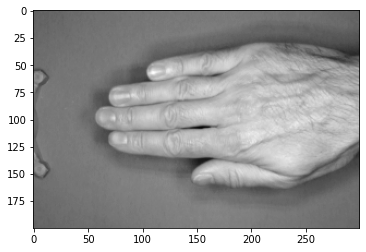

In [4]:
categories = ['paper','rock','scissors']

for k in categories:
	path = os.path.join(data_dir,k)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
		plt.imshow(img_array,cmap='gray')
		plt.show 
		break
	break

In [5]:
print(img_array)

[[87 85 84 ... 85 84 84]
 [84 85 84 ... 86 83 85]
 [83 84 84 ... 86 84 85]
 ...
 [86 86 86 ... 91 92 89]
 [86 86 86 ... 91 91 89]
 [86 87 86 ... 90 91 89]]


In [6]:
print(img_array.shape)

(200, 300)


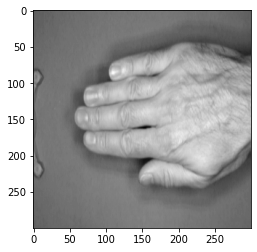

In [7]:
img_size = 300

new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [0]:

training_data = []
def create_training_data():
	for k in categories:
		path = os.path.join(data_dir,k)
		class_num = categories.index(k)
		for img in os.listdir(path):
			try:
				img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array,(img_size,img_size))
				training_data.append([new_array,class_num])
			except Exception as e:
				pass
        
create_training_data()
    

In [9]:
print(len(training_data))

1533


In [10]:
for sample in training_data[:10]:
  print(sample[1])



0
0
0
0
0
0
0
0
0
0


In [0]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
  print(sample[1])


0
2
2
2
1
2
0
1
2
1


In [0]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,1)
y = np.array(y) 

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [0]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
X[1]

array([[[82],
        [83],
        [81],
        ...,
        [87],
        [86],
        [85]],

       [[82],
        [83],
        [81],
        ...,
        [86],
        [86],
        [85]],

       [[81],
        [83],
        [81],
        ...,
        [85],
        [85],
        [85]],

       ...,

       [[85],
        [82],
        [84],
        ...,
        [87],
        [87],
        [87]],

       [[85],
        [84],
        [85],
        ...,
        [87],
        [88],
        [87]],

       [[85],
        [85],
        [84],
        ...,
        [87],
        [88],
        [87]]], dtype=uint8)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import pickle

In [0]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))
X = X/225


In [20]:
type(X)

numpy.ndarray

In [21]:
type(y)

numpy.ndarray

In [22]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X,y,batch_size = 32,epochs=3,validation_split = 0.1)


Epoch 1/3
44/44 [==============================] - 243s 6s/step - loss: 1.5407 - accuracy: 0.3408 - val_loss: -7.6165 - val_accuracy: 0.2727
Epoch 2/3
44/44 [==============================] - 244s 6s/step - loss: 0.7515 - accuracy: 0.3387 - val_loss: -64.7629 - val_accuracy: 0.2727
Epoch 3/3
44/44 [==============================] - 239s 5s/step - loss: -17.5002 - accuracy: 0.3394 - val_loss: -294.4856 - val_accuracy: 0.2727


## REFFERENCE
1. https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb#scrollTo=rN-Pc6Zd6awg

2. https://support.google.com/drive/thread/13694646?hl=en

3. https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/

4. https://www.youtube.com/watch?v=s-V7gKrsels